# Exploratory Data Analysis of RADS pkl

#### Charlotte Burbridge! :)

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
rads = pd.read_pickle('data-prep/pkl/rads.pkl')
rads

,Date,Time,Score,Level
0,12/14/2006,00:00:00,NaN,1
1,12/15/2006,00:00:00,NaN,1
2,12/21/2006,00:00:00,NaN,1
3,12/27/2006,00:00:00,NaN,1
4,1/3/2007,00:00:00,NaN,2
...,...,...,...,...
789,3/21/2022,00:00:00,27.0,1
790,3/23/2022,00:00:00,41.0,1
791,3/29/2022,00:00:00,30.0,1
792,4/4/2022,00:00:00,36.0,1


In [116]:
rads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    794 non-null    object 
 1   Time    794 non-null    object 
 2   Score   701 non-null    float64
 3   Level   794 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 24.9+ KB


In [117]:
rads['Score']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
789    27.0
790    41.0
791    30.0
792    36.0
793    20.0
Name: Score, Length: 794, dtype: float64

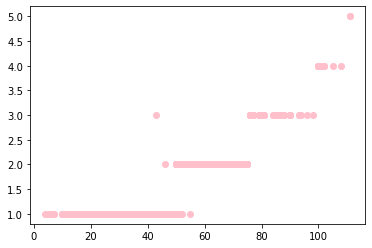

In [118]:
x = rads['Score']
y = rads['Level']

plt.scatter(x, y, c ="pink")

plt.show()

In [119]:
rads['Score'].value_counts()

50.0     51
49.0     35
47.0     21
46.0     17
41.0     16
         ..
24.0      1
108.0     1
28.0      1
101.0     1
98.0      1
Name: Score, Length: 91, dtype: int64

In [120]:
rads['Date']= pd.to_datetime(rads['Date'])

In [121]:
rads['Month'] = rads['Date'].dt.strftime('%m')
rads

,Date,Time,Score,Level,Month
0,2006-12-14,00:00:00,NaN,1,12
1,2006-12-15,00:00:00,NaN,1,12
2,2006-12-21,00:00:00,NaN,1,12
3,2006-12-27,00:00:00,NaN,1,12
4,2007-01-03,00:00:00,NaN,2,01
...,...,...,...,...,...
789,2022-03-21,00:00:00,27.0,1,03
790,2022-03-23,00:00:00,41.0,1,03
791,2022-03-29,00:00:00,30.0,1,03
792,2022-04-04,00:00:00,36.0,1,04


In [122]:
rads['Year'] = rads['Date'].dt.strftime('%y')
rads

,Date,Time,Score,Level,Month,Year
0,2006-12-14,00:00:00,NaN,1,12,06
1,2006-12-15,00:00:00,NaN,1,12,06
2,2006-12-21,00:00:00,NaN,1,12,06
3,2006-12-27,00:00:00,NaN,1,12,06
4,2007-01-03,00:00:00,NaN,2,01,07
...,...,...,...,...,...,...
789,2022-03-21,00:00:00,27.0,1,03,22
790,2022-03-23,00:00:00,41.0,1,03,22
791,2022-03-29,00:00:00,30.0,1,03,22
792,2022-04-04,00:00:00,36.0,1,04,22


#### Things to Work on

- Rads over time visualization
- Look at avalanche occurances in comparsion with the RADS Level (Do the Levels Correlate with what actually happens?)

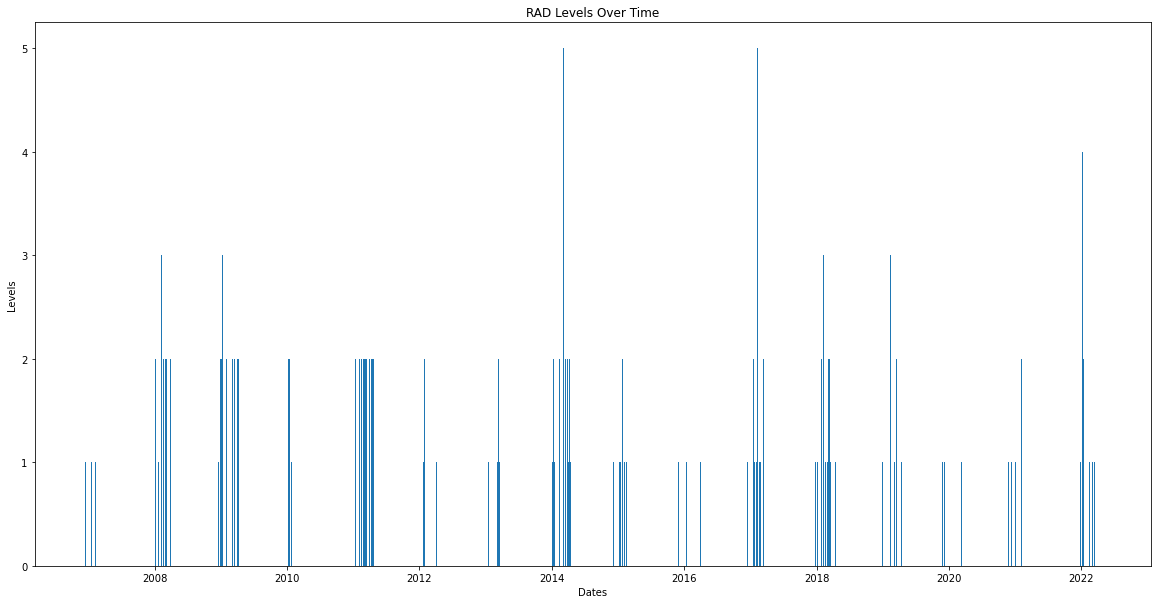

In [126]:
xx = rads['Date']
yy = rads['Level']

fig = plt.figure(figsize = (20, 10))
 
plt.bar(xx, yy)

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("RAD Levels Over Time")
plt.show()

In [110]:
# That's not very nice to looking so I think I should change the type of visualization
# Can I combine this with avalanche data to see when avalanches actually happened?

In [109]:
rads['Level'].value_counts()

1    384
2    328
3     68
4     10
5      4
Name: Level, dtype: int64